# Nairobi AirBnb Listing data Analysis
    * Data for the last 12 months (upto September 29, 2025)

This is a detailed analysis of a Sample dataset of Airbnb and vacational listings within Nairobi County. The objectives of this analysis are simple:

    1. Understand the distribution, trends and patterns of listings within Nairobi 

    2. Analyze the investment potential of investing in the market in terms of returns and revenue

Questions to guide the analysis:
- 

In [80]:
# import libraries and load data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.impute import SimpleImputer # to deal with missing values


# load df_listings with information about properties listed
df_listings = pd.read_csv(r'C:\Users\Morinyo Baddestman\Documents\AirbnbNairobi\data\listings_raw_data.csv')

# load df_calendar with information on occupancy of the Airbnbs
df_calendar =pd.read_csv(r'C:\Users\Morinyo Baddestman\Documents\AirbnbNairobi\data\past_calendar_rates_raw_data.csv')

In [81]:
print(df_listings.shape)
df_listings.head()

(300, 62)


,listing_id,listing_name,listing_type,room_type,cover_photo_url,photos_count,host_id,host_name,cohost_ids,cohost_names,...,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_revpar_native,l90d_adjusted_revpar,l90d_adjusted_revpar_native,l90d_reserved_days,l90d_blocked_days,l90d_available_days,l90d_total_days
0,75683,Kiloranhouse Apt Prime Bedroom,Private room in home,private_room,https://a0.muscache.com/im/pictures/5499026/ef...,13,26997,Adriel,NaN,NaN,...,0.011,0.000,0.5,58.9,0.0,0.0,1,0,89,90
1,471581,Located In a Serene Environment,Entire cottage,entire_home,https://a0.muscache.com/im/pictures/6434524/bc...,37,2280941,Bella,NaN,NaN,...,0.422,0.613,17.6,2278.3,25.6,3307.3,38,28,52,90
2,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,https://a0.muscache.com/im/pictures/68ecc57f-d...,29,4856316,Chichi,NaN,NaN,...,0.233,0.000,12.2,1576.3,0.0,0.0,21,0,69,90
3,1023556,Guesthouse Near Nairobi National Park & Airport,Entire guesthouse,entire_home,https://a0.muscache.com/im/pictures/ddd8badc-1...,20,5634522,Janet,NaN,NaN,...,0.033,0.000,0.6,83.3,0.0,0.0,3,0,87,90
4,1237886,Hob House,Room in bed and breakfast,hotel_room,https://a0.muscache.com/im/pictures/cbdab7e1-f...,8,6748840,NaN,NaN,NaN,...,0.056,0.000,7.0,910.2,0.0,0.0,5,0,85,90


In [13]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   300 non-null    int64  
 1   listing_name                 300 non-null    object 
 2   listing_type                 300 non-null    object 
 3   room_type                    300 non-null    object 
 4   cover_photo_url              300 non-null    object 
 5   photos_count                 300 non-null    int64  
 6   host_id                      300 non-null    int64  
 7   host_name                    298 non-null    object 
 8   cohost_ids                   100 non-null    object 
 9   cohost_names                 100 non-null    object 
 10  superhost                    300 non-null    bool   
 11  latitude                     300 non-null    float64
 12  longitude                    300 non-null    float64
 13  guests              

In [14]:
print(df_calendar.shape)
df_calendar.head()

(3552, 14)


,listing_id,date,vacant_days,reserved_days,occupancy,revenue,rate_avg,booked_rate_avg,booking_lead_time_avg,length_of_stay_avg,min_nights_avg,native_booked_rate_avg,native_rate_avg,native_revenue
0,36253079,2024-10-01,31,0,0.000,0.0,32.1,NaN,NaN,NaN,NaN,NaN,4141.0,0.0
1,36253079,2024-11-01,30,0,0.000,0.0,30.8,NaN,NaN,NaN,NaN,NaN,3973.0,0.0
2,36253079,2024-12-01,18,13,0.419,408.0,31.3,31.4,1.0,28.0,NaN,4066.0,4054.0,52839.0
3,36253079,2025-01-01,16,15,0.484,472.0,31.5,31.5,NaN,NaN,1.0,4069.0,4069.0,60968.0
4,36253079,2025-02-01,28,0,0.000,0.0,30.2,NaN,NaN,NaN,1.0,NaN,3901.0,0.0


In [49]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3552 non-null   int64  
 1   date                    3552 non-null   object 
 2   vacant_days             3552 non-null   int64  
 3   reserved_days           3552 non-null   int64  
 4   occupancy               3552 non-null   float64
 5   revenue                 3552 non-null   float64
 6   rate_avg                3552 non-null   float64
 7   booked_rate_avg         1868 non-null   float64
 8   booking_lead_time_avg   1662 non-null   float64
 9   length_of_stay_avg      1662 non-null   float64
 10  min_nights_avg          2691 non-null   float64
 11  native_booked_rate_avg  1868 non-null   float64
 12  native_rate_avg         3552 non-null   float64
 13  native_revenue          3552 non-null   float64
dtypes: float64(10), int64(3), object(1)
memo

### Data Cleaning & wrangling 

- remove duplicates
- harmonize data type inconsistencies
- remove unnecesary features
- deal with null values

In [82]:
# remove duplicates
df_listings.drop_duplicates()
print('duplicates removed')

# remove columns that exceed a 50% threhold for missing values for df_Listings
thresh = int( 0.5 * len(df_listings))
df_listings.dropna(thresh=thresh, axis=1, inplace=True)
print('=> features with extreme Nan_values removed')

duplicates removed
=> features with extreme Nan_values removed


In [83]:
# feature selection and manipulation in df_listings
    # calculate average exchange rate to use during currency conversion
rate = (df_listings.ttm_avg_rate_native / df_listings.ttm_avg_rate).mean()

    # convert cleaning_fee and extra_guest_fee from USD to KSH using the average exchange rate
df_listings.loc[:, 'cleaning_fee'] = round(df_listings['cleaning_fee'] * rate, 2)
df_listings.loc[:, 'extra_guest_fee'] = round(df_listings['extra_guest_fee'] * rate, 2)

    # drop some irrelevant columns and columns in USD currency
df_listings.drop(columns = ['cover_photo_url' ,'registration','rating_accuracy', 'rating_checkin','rating_cleanliness','rating_communication',
                            'rating_location','rating_value','ttm_revenue', 'ttm_avg_rate','ttm_revpar', 'ttm_adjusted_revpar', 'l90d_revenue', 
                           'l90d_avg_rate', 'ttm_total_days', 'l90d_total_days','l90d_revpar', 'l90d_adjusted_revpar','currency' ], inplace=True)

    # Check remaining missing values
df_listings.shape

(300, 41)

In [84]:
# rename some cols for easier referrencing 
df_listings.rename(columns= {'num_reviews':'total_reviews','ttm_revenue_native':'total_ttm_revenue', 'ttm_avg_rate_native': 'daily_avg_ttm_rate',
                             'ttm_revpar_native':'ttm_revpar', 'ttm_adjusted_revpar_native':'ttm_adjusted_revpar', 'l90d_revenue_native':'l90d_revenue',
                             'l90d_avg_rate_native':'l90d_avg_rate','l90d_revpar_native':'l90d_revpar', 'l90d_adjusted_revpar_native':'l90d_adjusted_revpar',
                             }, inplace=True)

In [ ]:
df_listings.isna().sum()

In [85]:
# select features with missing values 
discrete_cols = ['guests', 'bedrooms', 'beds', 'baths', 'instant_book', 'professional_management', 'min_nights']
continous_cols = ['cleaning_fee', 'extra_guest_fee', 'rating_overall']

# import imputer class and fill in missing values 
imputer_d = SimpleImputer(strategy="most_frequent", copy=False)
imputer_c = SimpleImputer(strategy="mean", copy=False)

df_listings[discrete_cols] = imputer_d.fit_transform(df_listings[discrete_cols])
df_listings[continous_cols] = imputer_c.fit_transform(df_listings[continous_cols])

# fill in missing value in 'host_name' feature with 'missing' as the place_holder
df_listings.host_name.fillna('missing', inplace=True)

# confirm there are no missing values 
df_listings.isna().sum()

C:\Users\Morinyo Baddestman\AppData\Local\Temp\ipykernel_15724\2253721874.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_listings.host_name.fillna('missing', inplace=True)


listing_id                 0
listing_name               0
listing_type               0
room_type                  0
photos_count               0
host_id                    0
host_name                  0
superhost                  0
latitude                   0
longitude                  0
guests                     0
bedrooms                   0
beds                       0
baths                      0
amenities                  0
instant_book               0
professional_management    0
min_nights                 0
cancellation_policy        0
cleaning_fee               0
extra_guest_fee            0
total_reviews              0
rating_overall             0
total_ttm_revenue          0
daily_avg_ttm_rate         0
ttm_occupancy              0
ttm_adjusted_occupancy     0
ttm_revpar                 0
ttm_adjusted_revpar        0
ttm_reserved_days          0
ttm_blocked_days           0
ttm_available_days         0
l90d_revenue               0
l90d_avg_rate              0
l90d_occupancy

### For df_calendar

In [86]:
# remove duplicates in df_calendar
df_calendar.drop_duplicates()
print('duplicates removed')

# remove columns that dont meet threhold 50% for nan_values for df_calendar
thresh= int(0.5* len(df_calendar))
df_calendar.dropna(thresh=thresh, axis=1, inplace=True)
print(df_calendar.shape)

# convert date column to datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')
df_calendar.date.dtypes

duplicates removed
(3552, 12)


dtype('<M8[ns]')

In [87]:
# feature manipulation and wrangling in df_calendar
df_calendar.drop(columns=['revenue', 'rate_avg', 'booked_rate_avg'], inplace=True)
df_calendar.rename(columns={'occupancy':'occupancy_rate', 'native_rate_avg':'rate_avg', 'native_revenue':'revenue'}
                   , inplace=True)
print(df_calendar.shape)
df_calendar.head()

(3552, 9)


,listing_id,date,vacant_days,reserved_days,occupancy_rate,min_nights_avg,native_booked_rate_avg,rate_avg,revenue
0,36253079,2024-10-01,31,0,0.000,NaN,NaN,4141.0,0.0
1,36253079,2024-11-01,30,0,0.000,NaN,NaN,3973.0,0.0
2,36253079,2024-12-01,18,13,0.419,NaN,4066.0,4054.0,52839.0
3,36253079,2025-01-01,16,15,0.484,1.0,4069.0,4069.0,60968.0
4,36253079,2025-02-01,28,0,0.000,1.0,NaN,3901.0,0.0


In [ ]:
df_calendar.isna().sum()

In [88]:
# deal with missing values
df_calendar['min_nights_avg'] = imputer_d.fit_transform(df_calendar[['min_nights_avg']])
df_calendar.isna().sum()

listing_id                   0
date                         0
vacant_days                  0
reserved_days                0
occupancy_rate               0
min_nights_avg               0
native_booked_rate_avg    1684
rate_avg                     0
revenue                      0
dtype: int64

In [ ]:
# extract day of the week and month from the date column


### Exploratory data analysis

In [ ]:
# identify the number unique samples in each feature
df_listings.nunique()

# define columns to exclude
no = ['listing_id', 'host_id','latitude', 'longitude', 'instant_book', 'professional_management', 'min_nights']

# summary stats for numerical features
num_cols = [col for col in df_listings.select_dtypes(exclude= ['object','bool']) if col not in no ]
df_listings[num_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
photos_count,300.0,30.44,16.05,0.00,19.00,29.00,37.00,122.00
cleaning_fee,300.0,1169.83,2734.34,0.00,0.00,0.00,1292.13,33595.34
extra_guest_fee,300.0,460.75,1387.71,0.00,0.00,0.00,460.75,12921.29
total_reviews,300.0,59.01,74.17,1.00,18.00,39.00,77.00,692.00
rating_overall,300.0,4.78,0.17,4.17,4.70,4.80,4.90,5.00
total_ttm_revenue,300.0,536551.15,905590.39,17745.00,125538.00,278381.50,633396.50,11802110.00
daily_avg_ttm_rate,300.0,7131.94,6660.59,1292.80,4105.28,5892.15,8381.17,88606.50
ttm_occupancy,300.0,0.20,0.18,0.03,0.06,0.14,0.28,0.90
ttm_adjusted_occupancy,300.0,0.17,0.20,0.00,0.00,0.09,0.29,0.87
ttm_revpar,300.0,1470.00,2481.07,48.60,343.98,762.70,1735.35,32334.50


In [91]:
# summary stats for categorical columns
extra = ['guests', 'bedrooms', 'beds', 'baths', 'instant_book', 'professional_management', 'min_nights']
cat_cols = [col for col in df_listings.select_dtypes(['object','bool']) if col not in no]
cols = extra + cat_cols

df_listings[cols].describe().T

,count,unique,top,freq
guests,300.0,11.0,2.0,165.0
bedrooms,300.0,9.0,1.0,162.0
beds,300.0,12.0,1.0,143.0
baths,300.0,12.0,1.0,117.0
instant_book,300,2,True,165
professional_management,300,1,False,300
min_nights,300.0,9.0,1.0,152.0
listing_name,300,298,Bonsai Villa - Standard King Room,2
listing_type,300,29,Entire rental unit,129
room_type,300,3,entire_home,251


**insights from the summary statistics**
- The average daily cost  for booking in Nairobi ranges from 1,292.8 Ksh as the lowest to 8,8606.5 Ksh as the highest rate. Its important to note that 50% of the the listed Airbnbs cost 5,892.15Ksh and below

- the average occupancy rate for a listing within Nairobi is 20%, this means that out of 365 days in a year, a listing is reserved for 73 days.

- most of the listed room type is entire home

- about 50% of the listings don't charge for an extra guest. 25% of those that charge extra for a guest, the amount charged is 460.75Ksh and below

    - Revenue related

- The average yearly revenue for a listing is 53,6551.15 Ksh. The listing that recorded the least amount generated a revenue of 17,745.0 ksh and the maximum amount generated was 11,802,110.0 Ksh. 

- 50% of the listings generate a revenue of 278,381.5 Ksh and below per year

- The revenue per room in a year is about 1,470.0 Ksh




# the analysis is geared towards answering questions that affect mainly revenue and occupancy
- categorical feature analysis 

- correlation analysis
- relationship between categorical features and select columns[revenue, revpar]
- 

In [108]:
df_listings.head()

,listing_id,listing_name,listing_type,room_type,photos_count,host_id,host_name,superhost,latitude,longitude,...,ttm_available_days,l90d_revenue,l90d_avg_rate,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_adjusted_revpar,l90d_reserved_days,l90d_blocked_days,l90d_available_days
0,75683,Kiloranhouse Apt Prime Bedroom,Private room in home,private_room,13,26997,Adriel,False,-1.2848,36.7924,...,355,5297.0,5522.9,0.011,0.000,58.9,0.0,1,0,89
1,471581,Located In a Serene Environment,Entire cottage,entire_home,37,2280941,Bella,True,-1.2268,36.8577,...,245,205050.0,5395.0,0.422,0.613,2278.3,3307.3,38,28,52
2,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,29,4856316,Chichi,True,-1.3240,36.7053,...,265,141869.0,7004.4,0.233,0.000,1576.3,0.0,21,0,69
3,1023556,Guesthouse Near Nairobi National Park & Airport,Entire guesthouse,entire_home,20,5634522,Janet,False,-1.3222,36.7852,...,354,7494.0,2591.3,0.033,0.000,83.3,0.0,3,0,87
4,1237886,Hob House,Room in bed and breakfast,hotel_room,8,6748840,missing,False,-1.2258,36.7679,...,350,81916.0,16103.0,0.056,0.000,910.2,0.0,5,0,85


In [ ]:
# plot distributions to identify skew
['cleaning_fee','extra_guest_fee', 'total_reviews']

In [100]:
# Plot distributions of the most significant features
cols_listings = ['total_ttm_revenue', 'daily_avg_ttm_rate','ttm_revpar', 
                 'ttm_reserved_days',  'l90d_revenue', 'l90d_avg_rate', 'l90d_revpar']

print(len(cols_listings))

def create_distributions(data, cols, nrows, ncols):
    # create the figure canvas
    fig, axs = plt.subplots(nrows,ncols, figsize=(30,30))
    fig.subplots_adjust(wspace=0.1, hspace=0.1, top=0.94)
    axs = axs.flatten()

    # plot the boxplots
    for i, col in enumerate(cols):
        if i < len(cols):
            sns.boxplot(data=data, x=col ,ax=axs[i] )
            axs[i].set_title(f'{col} boxplot')
        else:
            break
    fig.suptitle('Distributions of Features', fontsize=28)

#create_distributions(df_listings, cols_listings[:8], 2,4)

7


In [ ]:
cols_listings = ['total_ttm_revenue', 'daily_avg_ttm_rate','ttm_revpar', 
                 'ttm_reserved_days',  'l90d_revenue', 'l90d_avg_rate', 'l90d_revpar']

,count,mean,std,min,25%,50%,75%,max
photos_count,300.0,30.44,16.05,0.00,19.00,29.00,37.00,122.00
cleaning_fee,300.0,1169.83,2734.34,0.00,0.00,0.00,1292.13,33595.34
extra_guest_fee,300.0,460.75,1387.71,0.00,0.00,0.00,460.75,12921.29
total_reviews,300.0,59.01,74.17,1.00,18.00,39.00,77.00,692.00
rating_overall,300.0,4.78,0.17,4.17,4.70,4.80,4.90,5.00
total_ttm_revenue,300.0,536551.15,905590.39,17745.00,125538.00,278381.50,633396.50,11802110.00
daily_avg_ttm_rate,300.0,7131.94,6660.59,1292.80,4105.28,5892.15,8381.17,88606.50
ttm_occupancy,300.0,0.20,0.18,0.03,0.06,0.14,0.28,0.90
ttm_adjusted_occupancy,300.0,0.17,0.20,0.00,0.00,0.09,0.29,0.87
ttm_revpar,300.0,1470.00,2481.07,48.60,343.98,762.70,1735.35,32334.50


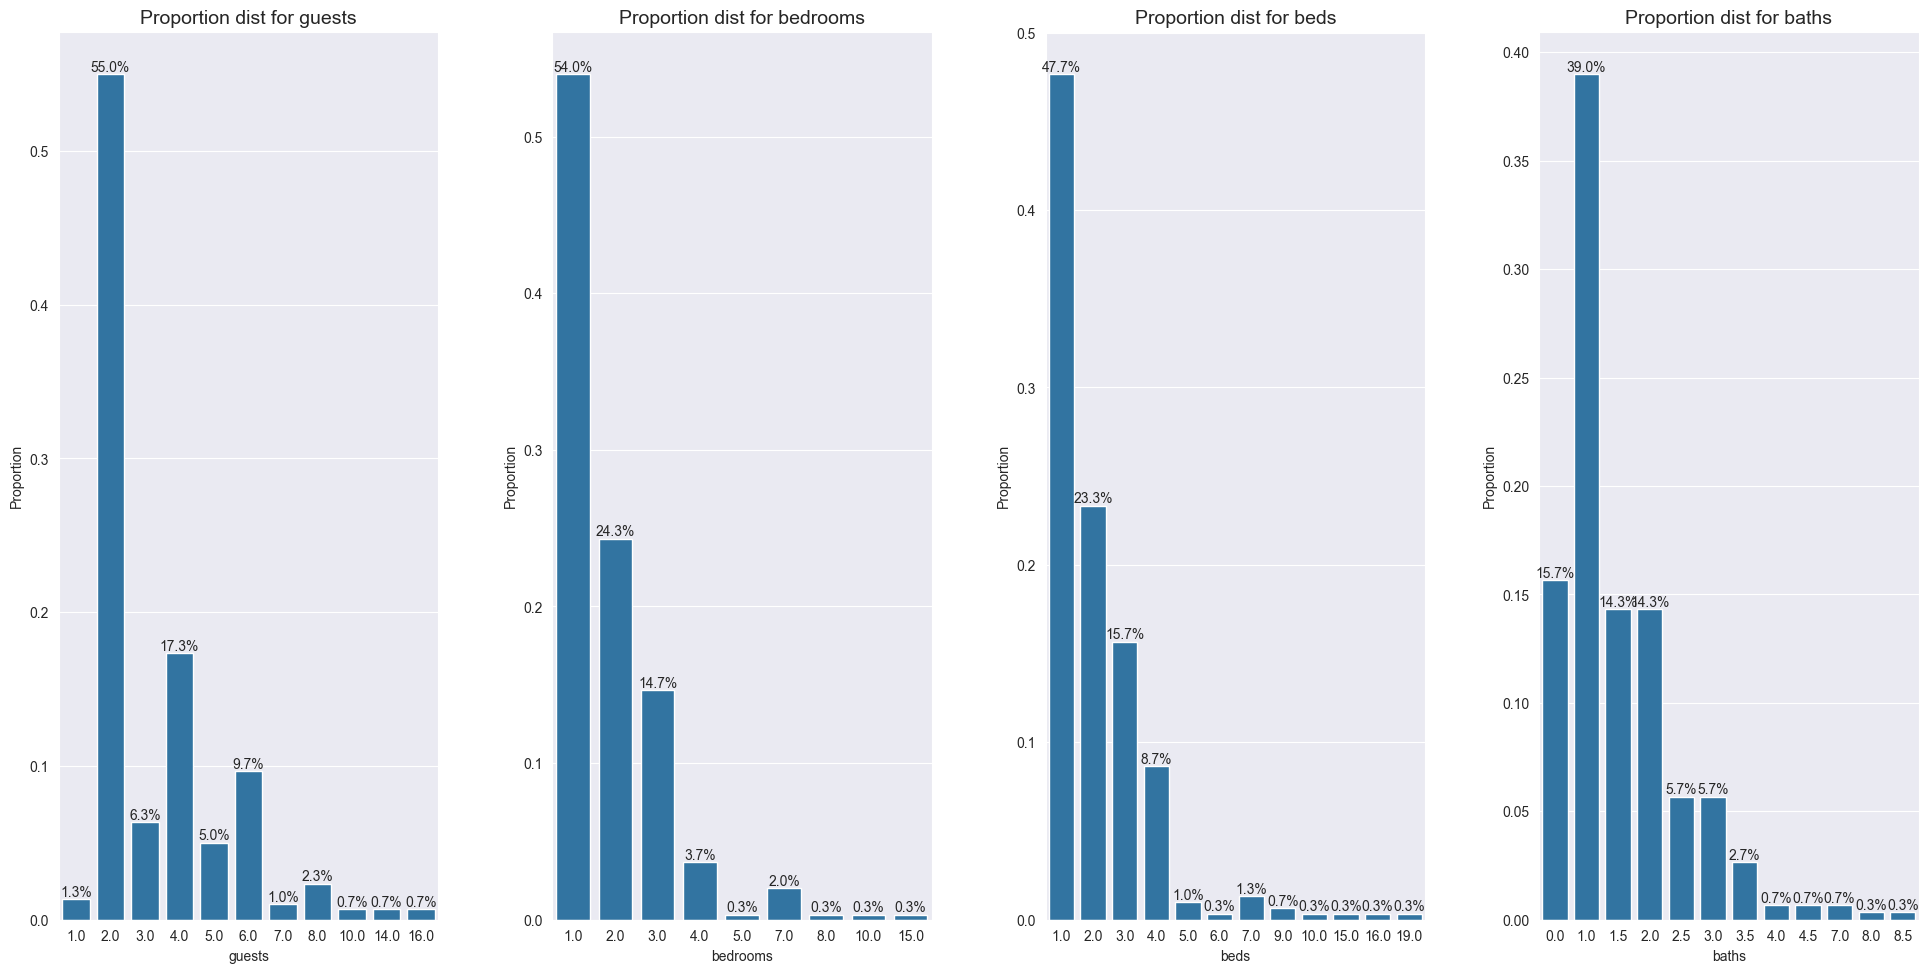

In [ ]:
# Select categorical features
cat_cols = ['guests','bedrooms', 'beds', 'baths', 'room_type', 'min_nights', 'cancellation_policy']

# Define the figure canvas
fig, axs = plt.subplots(1, 4, figsize=(24, 12))
plt.subplots_adjust(hspace=0.2, wspace=0.3, top=0.85)

# Loop through categorical columns and plot
for i, col in enumerate(cat_cols):
    ax = axs[i]
    sns.countplot(data=df_listings, x=col, ax=ax, stat='proportion')
    ax.set_title(f'Proportion dist for {col}', fontsize=14)
    ax.set_ylabel("Proportion")

    # Annotate each bar in the current axis
    for p in ax.patches:
        prop = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        label = f'{prop:.1%}'  # Format as percentage
        ax.annotate(label, (x, y), ha='center', va='bottom', fontsize=10)

plt.show()


room_type
entire_home     84.000000
private_room    15.666667
hotel_room       0.333333
Name: proportion, dtype: float64
guests
2.0     47.286822
4.0     20.930233
6.0     12.015504
3.0      6.589147
5.0      5.813953
8.0      2.325581
1.0      1.550388
7.0      1.162791
16.0     0.775194
10.0     0.775194
14.0     0.775194
Name: proportion, dtype: float64
min_nights
1.0     49.664430
2.0     33.221477
3.0     10.738255
4.0      2.013423
7.0      1.677852
14.0     0.671141
30.0     0.671141
28.0     0.671141
5.0      0.671141
Name: proportion, dtype: float64
cancellation_policy
Flexible    43.812709
Moderate    36.454849
Strict      12.374582
Firm         7.357860
Name: proportion, dtype: float64
==========++++++++++++-------------


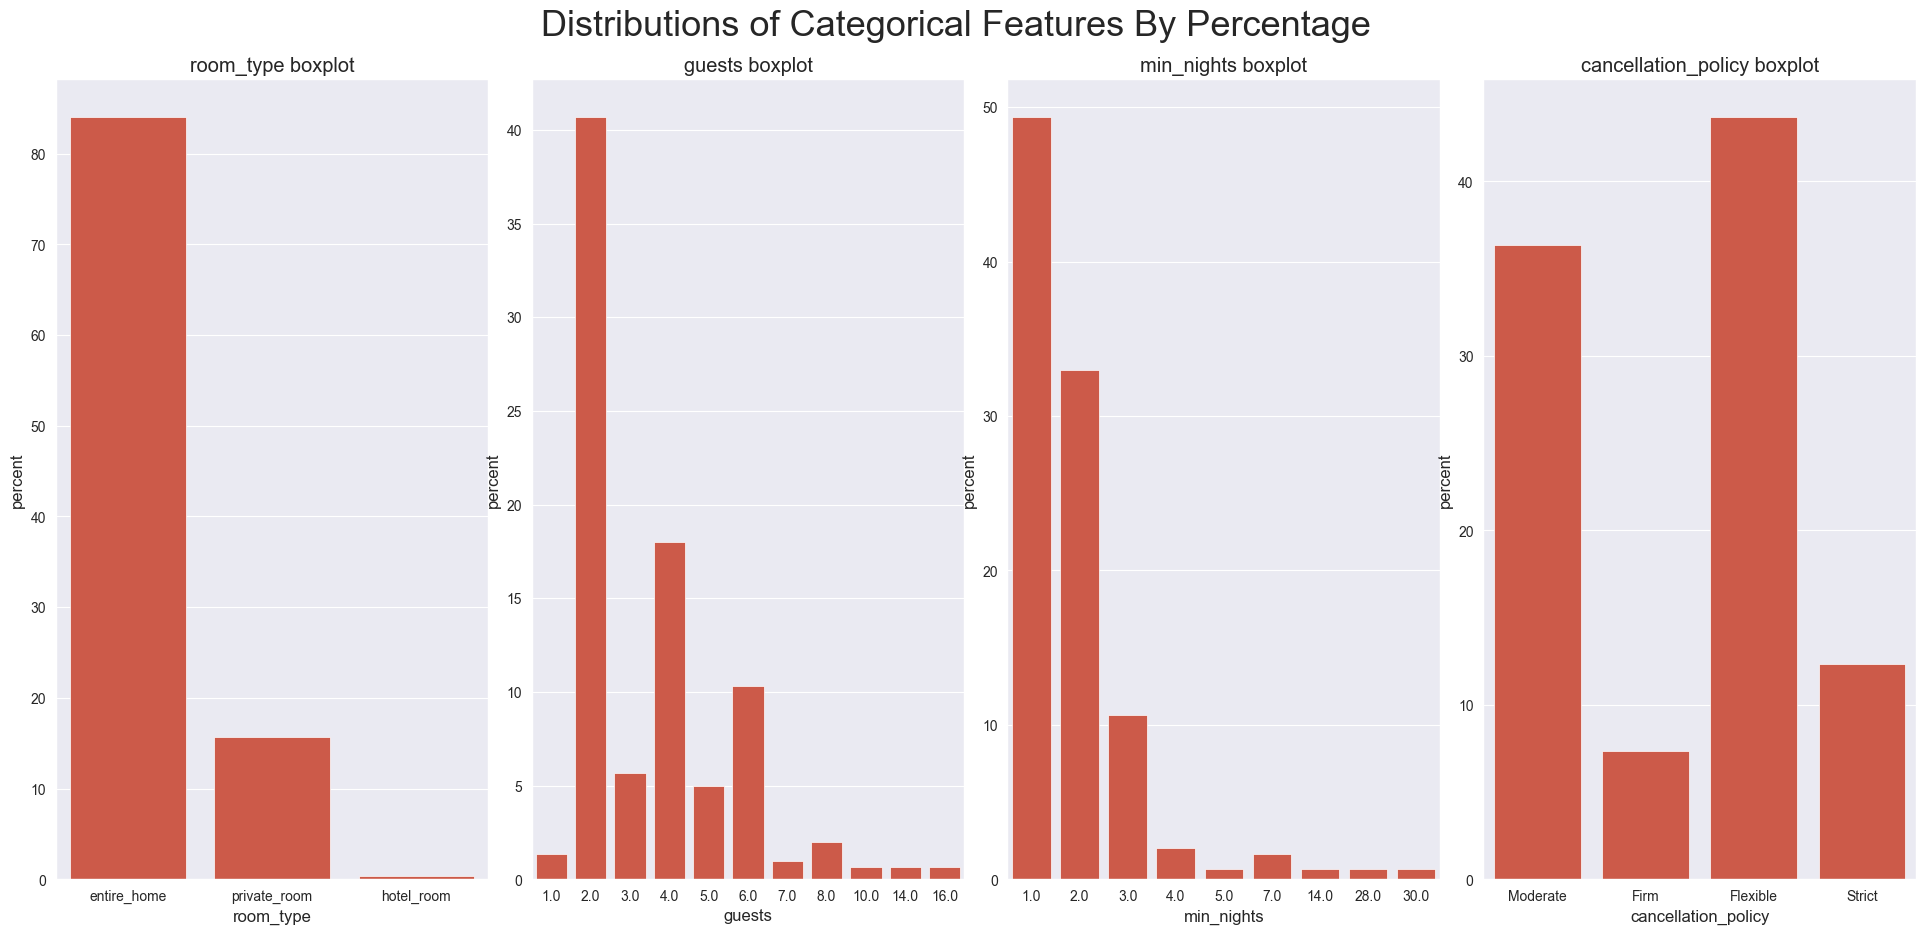

In [ ]:
cat_cols2 = [ ]

for col in cat_cols2:
    print(df_listings[col].value_counts(normalize=True)*100)

print('==========++++++++++++-------------')

def create_countplots(data, cols):
    # create the figure canvas
    fig, axs = plt.subplots(1,4, figsize=(24,10))
    fig.subplots_adjust(wspace=0.1, hspace=0.1, top=0.91)
    axs = axs.flatten()

    # plot the boxplots
    for i, col in enumerate(cols):
        if i < len(cols):
            sns.countplot(data=data, x=col ,ax=axs[i], stat='percent')
            axs[i].set_title(f'{col} boxplot')
        else:
            break
    fig.suptitle('Distributions of Categorical Features By Percentage', fontsize=26)

create_countplots(df_listings, cat_cols2)

In [63]:
df_listings.listing_type.value_counts()

listing_type
Entire rental unit                    128
Entire serviced apartment              28
Entire condo                           26
Entire guesthouse                      21
Private room in rental unit            19
Entire home                            19
Private room in bed and breakfast       8
Entire guest suite                      6
Entire cottage                          5
Private room in villa                   5
Entire bungalow                         4
Private room in home                    3
Private room in cottage                 3
Entire chalet                           3
Treehouse                               3
Tiny home                               2
Entire loft                             2
Entire cabin                            2
Private room in nature lodge            2
Private room in condo                   2
Room in bed and breakfast               1
Private room in serviced apartment      1
Private room in guest suite             1
Bus                  

**Insights**
- listings with entire home listed account for the largest percentage 84% of Airbnb's listed 


### Bivariate & Multivariate analysis

In [102]:
non_cols = ['listing_id', 'host_id', 'latitude', 'longitude', 'superhost', 'guests', 'bedrooms','beds', 'baths', 'min_nights']
cor_cols = [c for c in df_listings.select_dtypes(exclude='object') if c not in non_cols]
correlation = df_listings[cor_cols].corr().round(2)
correlation

,photos_count,cleaning_fee,extra_guest_fee,total_reviews,rating_overall,total_ttm_revenue,daily_avg_ttm_rate,ttm_occupancy,ttm_adjusted_occupancy,ttm_revpar,...,ttm_available_days,l90d_revenue,l90d_avg_rate,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_adjusted_revpar,l90d_reserved_days,l90d_blocked_days,l90d_available_days
photos_count,1.00,0.02,0.03,0.14,0.10,0.17,0.19,0.05,0.03,0.17,...,-0.05,0.18,0.21,0.12,0.15,0.18,0.19,0.12,0.06,-0.12
cleaning_fee,0.02,1.00,0.06,-0.08,0.00,0.16,0.24,-0.07,-0.09,0.16,...,0.07,0.17,0.20,-0.07,-0.03,0.17,0.04,-0.07,-0.01,0.07
extra_guest_fee,0.03,0.06,1.00,-0.02,0.12,0.04,0.12,-0.04,-0.11,0.04,...,0.04,0.06,0.17,-0.04,-0.05,0.06,-0.03,-0.04,-0.11,0.04
total_reviews,0.14,-0.08,-0.02,1.00,0.12,0.34,0.04,0.39,0.00,0.34,...,-0.39,0.19,0.08,0.24,-0.00,0.19,0.01,0.24,-0.08,-0.24
rating_overall,0.10,0.00,0.12,0.12,1.00,0.14,0.08,0.20,0.09,0.14,...,-0.20,0.10,0.08,0.16,0.02,0.10,0.01,0.16,0.01,-0.16
total_ttm_revenue,0.17,0.16,0.04,0.34,0.14,1.00,0.71,0.54,0.20,1.00,...,-0.54,0.91,0.72,0.46,0.11,0.91,0.17,0.46,-0.04,-0.46
daily_avg_ttm_rate,0.19,0.24,0.12,0.04,0.08,0.71,1.00,-0.00,-0.04,0.71,...,0.00,0.75,0.95,0.09,-0.03,0.75,0.13,0.09,-0.01,-0.09
ttm_occupancy,0.05,-0.07,-0.04,0.39,0.20,0.54,-0.00,1.00,0.52,0.54,...,-1.00,0.36,0.05,0.73,0.37,0.36,0.25,0.73,0.02,-0.73
ttm_adjusted_occupancy,0.03,-0.09,-0.11,0.00,0.09,0.20,-0.04,0.52,1.00,0.20,...,-0.52,0.11,-0.02,0.27,0.60,0.11,0.43,0.27,0.41,-0.27
ttm_revpar,0.17,0.16,0.04,0.34,0.14,1.00,0.71,0.54,0.20,1.00,...,-0.54,0.91,0.72,0.46,0.11,0.91,0.17,0.46,-0.04,-0.46


#### Investigating Factors influencing revenue per room 
- average daily-rate for room-types()

- does daily rate affect occupancy rates

- revenue per room

In [103]:
correlation[['ttm_revpar']].sort_values(by='ttm_revpar', ascending=False)

,ttm_revpar
total_ttm_revenue,1.00
ttm_revpar,1.00
l90d_revenue,0.91
l90d_revpar,0.91
ttm_adjusted_revpar,0.75
l90d_avg_rate,0.72
daily_avg_ttm_rate,0.71
ttm_reserved_days,0.54
ttm_occupancy,0.54
l90d_reserved_days,0.46


In [106]:
# average revpar per room type
df_listings.groupby('room_type')['ttm_revpar'].mean()


room_type
entire_home     1632.780952
hotel_room       612.100000
private_room     588.600000
Name: ttm_revpar, dtype: float64

In [113]:
# average revpar per room type
print(df_listings.groupby('bedrooms')['ttm_revpar'].mean().sort_values(ascending=False).round(2))

print('==========+++++++++++++++==========+++++++++++++')
df_listings.groupby('beds')['ttm_revpar'].mean().sort_values(ascending=False).round(2)

bedrooms
4.0     4694.97
5.0     3864.40
3.0     1864.88
1.0     1465.69
2.0     1465.62
10.0    1040.80
7.0      540.30
8.0      359.80
15.0      90.70
Name: ttm_revpar, dtype: float64
==========+++++++++++++++==========+++++++++++++


beds
6.0     3864.40
4.0     3289.60
5.0     2816.50
3.0     1705.59
2.0     1442.36
1.0     1105.42
16.0    1040.80
19.0    1020.10
9.0      687.20
7.0      581.42
10.0     359.80
15.0      90.70
Name: ttm_revpar, dtype: float64

In [157]:
# average revpar per room type
print(df_listings.groupby(['bedrooms', 'beds'])['ttm_revpar'].mean().sort_values(ascending=False).round(2))


bedrooms  beds
4.0       4.0     6170.30
5.0       6.0     3864.40
2.0       4.0     3241.65
4.0       5.0     2816.50
3.0       2.0     2604.60
          4.0     2294.26
1.0       2.0     2097.22
2.0       3.0     1806.31
3.0       3.0     1647.11
4.0       7.0     1478.40
1.0       1.0     1397.32
2.0       2.0     1279.02
10.0      16.0    1040.80
7.0       19.0    1020.10
          9.0      687.20
2.0       1.0      548.67
8.0       10.0     359.80
7.0       7.0      282.43
15.0      15.0      90.70
Name: ttm_revpar, dtype: float64


<Axes: xlabel='bedrooms', ylabel='ttm_revpar'>

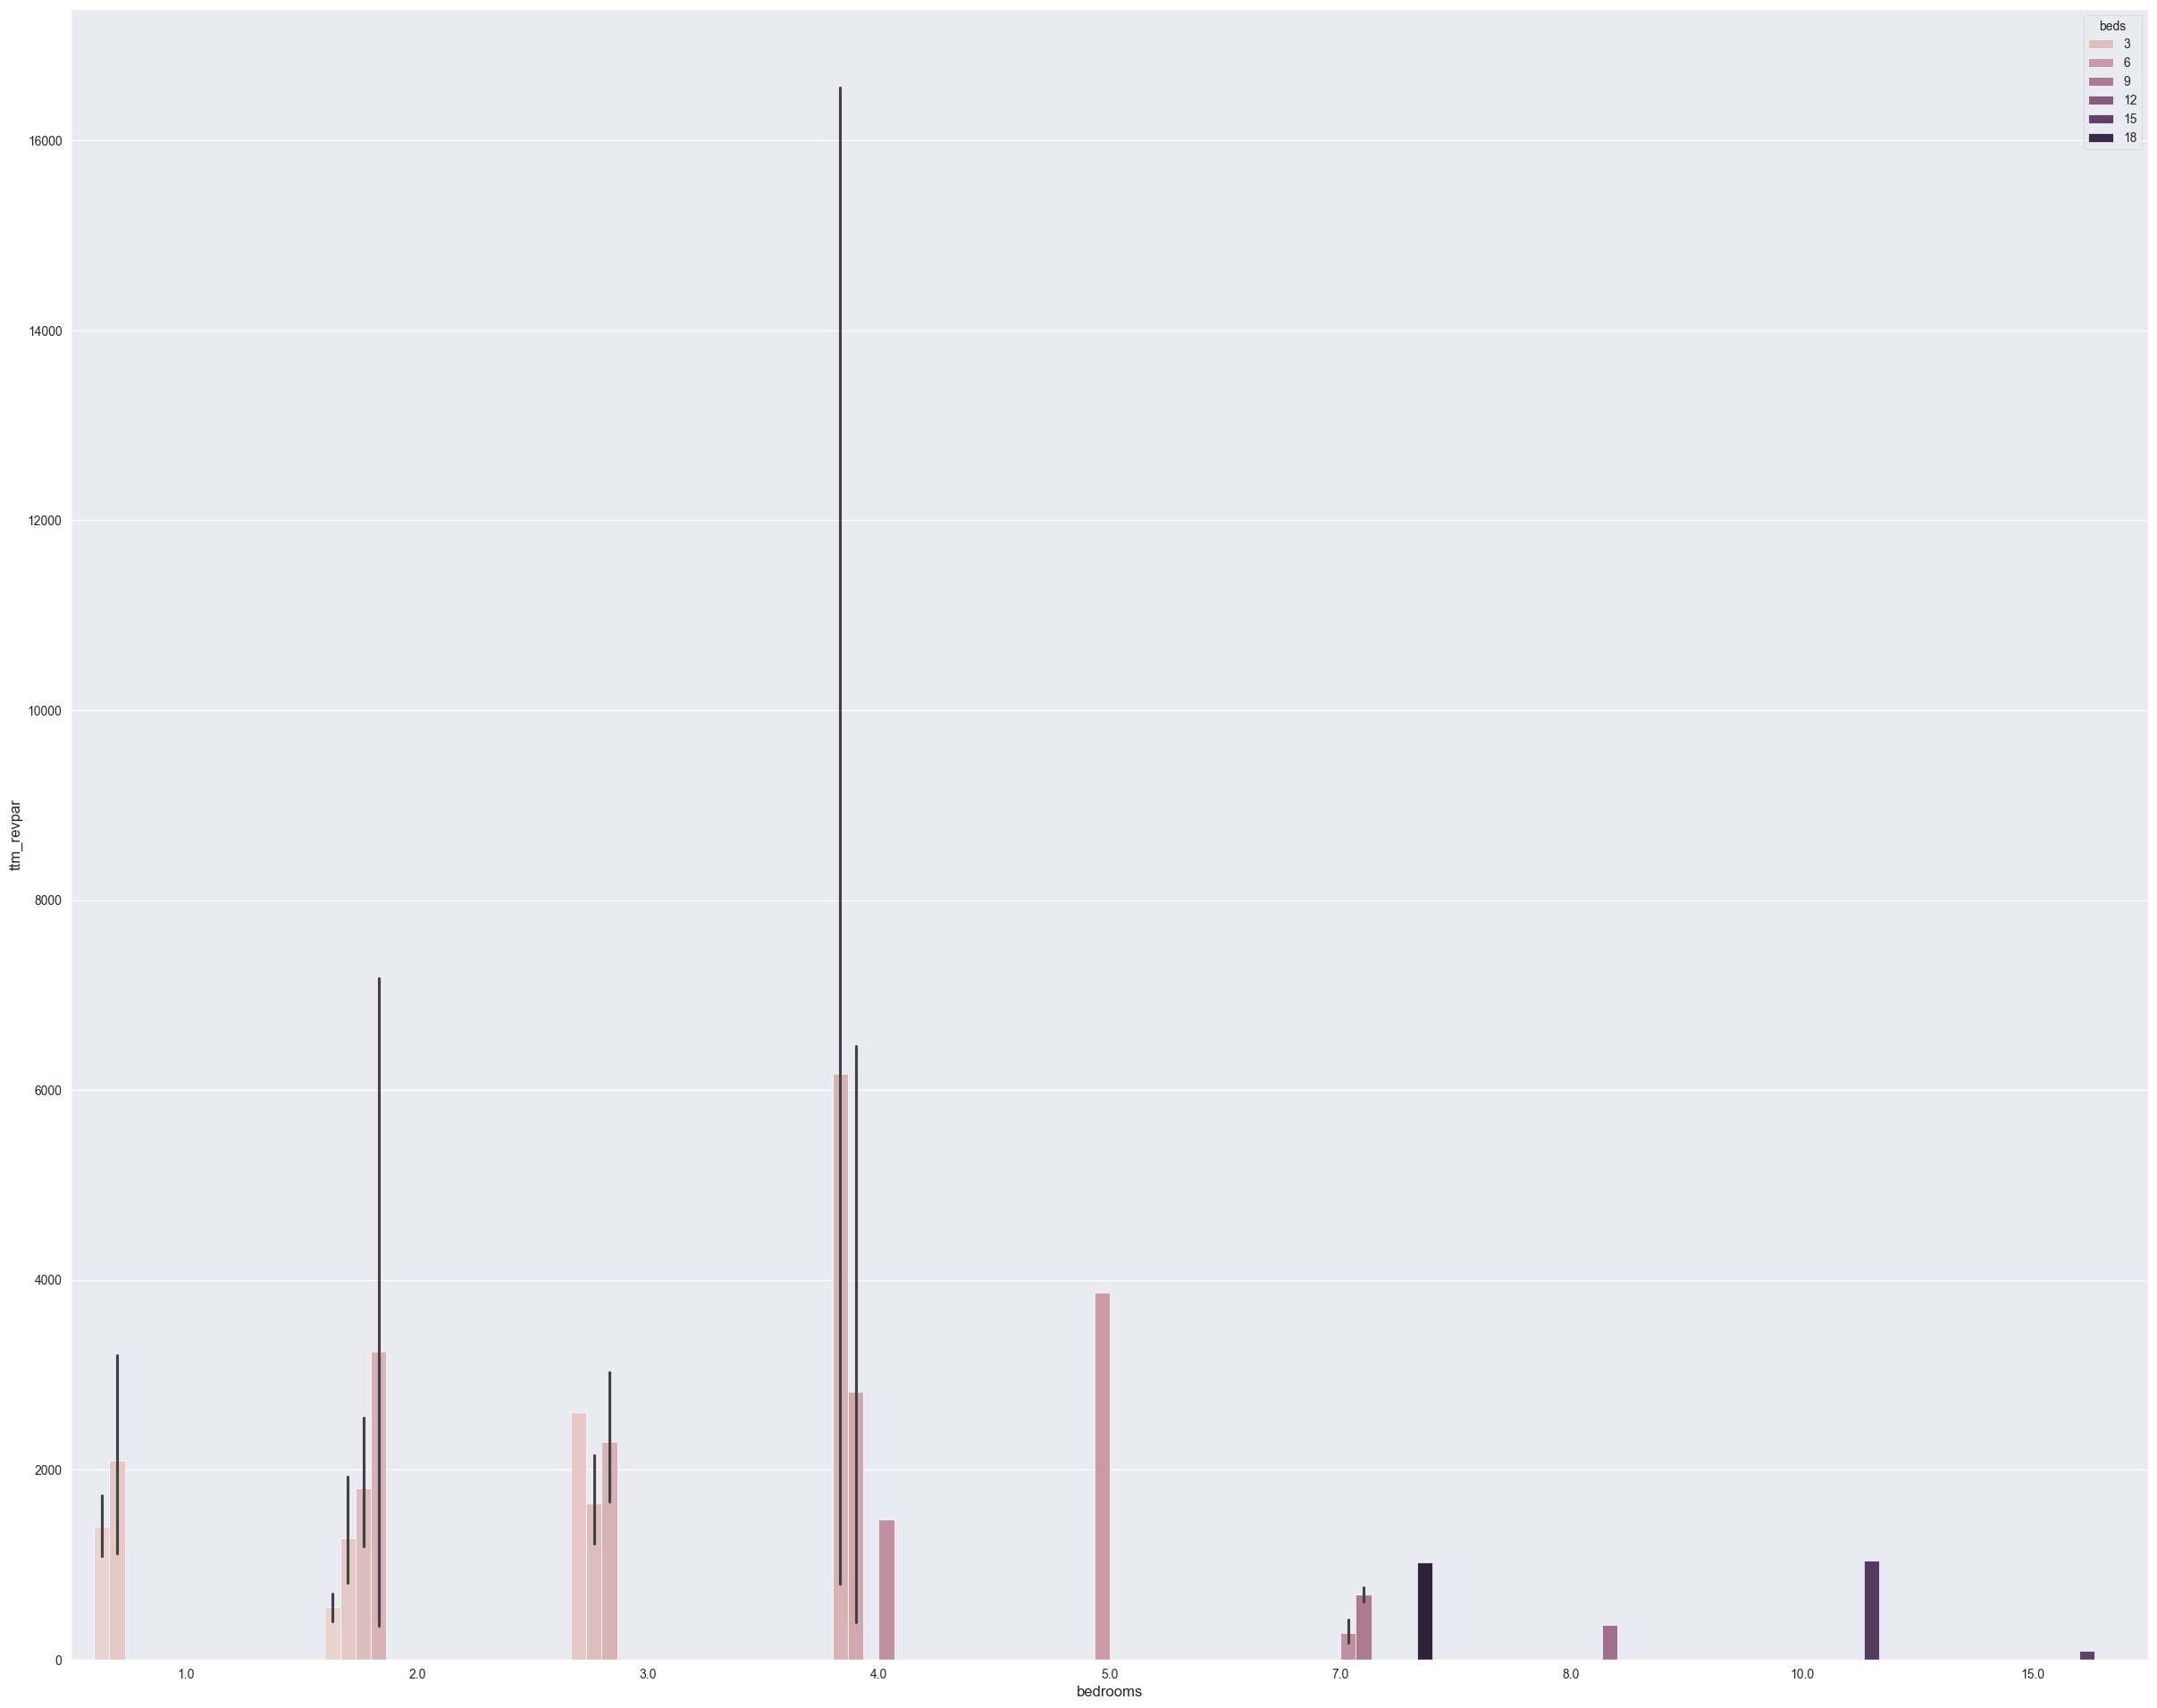

In [155]:
# average revpar per room type
plt.figure(figsize=(30,24))
sns.barplot(data=df_listings, x='bedrooms', hue= 'beds', y='ttm_revpar')

*** 
- for the room_types, revenue_per_room was highest in listed entire homes, followed by hotel_room with the least returns coming from private rooms

- in the bed category, 6-bed listings recorded the highest returns 


### Investigating total revenue 
- what factors influence revenue
does revenue depend on - listing_type, room_type
                        - min_nights
                        - occupancy rates 
                        - cat_cols

In [127]:
correlation[['total_ttm_revenue']].sort_values(by='total_ttm_revenue', ascending=False)

,total_ttm_revenue
total_ttm_revenue,1.00
ttm_revpar,1.00
l90d_revenue,0.91
l90d_revpar,0.91
ttm_adjusted_revpar,0.75
l90d_avg_rate,0.72
daily_avg_ttm_rate,0.71
ttm_reserved_days,0.54
ttm_occupancy,0.54
l90d_reserved_days,0.46


In [139]:
print(df_listings.groupby(['beds'])['total_ttm_revenue'].mean().round(2).sort_values(ascending=False))
print('+++++++==============+++++++++')
print(df_listings.groupby(['bedrooms'])['total_ttm_revenue'].mean().round(2).sort_values(ascending=False))
print('+++++++==============+++++++++')
print(df_listings.groupby(['min_nights'])['total_ttm_revenue'].mean().round(2).sort_values(ascending=False))

beds
6.0     1410515.00
4.0     1200704.08
5.0     1028032.33
3.0      622540.29
2.0      526462.48
1.0      403481.13
16.0     379892.00
19.0     372329.00
9.0      250835.50
7.0      212219.00
10.0     131327.00
15.0      33092.00
Name: total_ttm_revenue, dtype: float64
+++++++==============+++++++++
bedrooms
4.0     1713665.00
5.0     1410515.00
3.0      680681.98
1.0      534978.69
2.0      534952.30
10.0     379892.00
7.0      197212.50
8.0      131327.00
15.0      33092.00
Name: total_ttm_revenue, dtype: float64
+++++++==============+++++++++
min_nights
4.0     683880.17
7.0     644807.80
3.0     614796.66
2.0     554596.55
1.0     518366.99
30.0    403611.00
28.0    209608.00
14.0     65701.00
5.0      22601.00
Name: total_ttm_revenue, dtype: float64


In [124]:
df_listings.head()

,listing_id,listing_name,listing_type,room_type,photos_count,host_id,host_name,superhost,latitude,longitude,...,ttm_available_days,l90d_revenue,l90d_avg_rate,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_adjusted_revpar,l90d_reserved_days,l90d_blocked_days,l90d_available_days
0,471581,Located In a Serene Environment,Entire cottage,entire_home,37,2280941,Bella,True,-1.2268,36.8577,...,257,233475.0,5202.7,0.500,0.726,2594.2,3765.7,45,28,45
1,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,29,4856316,Chichi,True,-1.3240,36.7053,...,284,67833.0,6888.1,0.111,0.147,753.7,997.5,10,22,80
2,1023556,Home in Langata 1 km to Nairobi National Park,Entire guesthouse,entire_home,20,5634522,Janet,False,-1.3222,36.7852,...,354,10078.0,2482.1,0.044,0.000,112.0,0.0,4,0,86
3,1237886,Hob House,Room in bed and breakfast,hotel_room,8,6748840,NaN,False,-1.2258,36.7679,...,350,80106.0,15639.3,0.056,0.000,890.1,0.0,5,0,85
4,1803821,Makena's Place Karen - All Rooms,Private room in cottage,private_room,58,4856316,Chichi,True,-1.3237,36.7059,...,326,65507.0,16196.3,0.044,0.055,727.9,897.4,4,17,86


### Investigating Occupancy rates
whats the occupancy rates in relation to 

- listing type (beds, bedrooms )
                                        
- superhost status
                                        
- min_nights

In [89]:
# investigate factors that influence occupancy
correlation[[ 'ttm_adjusted_occupancy', 'ttm_occupancy']].sort_values(by='ttm_adjusted_occupancy', ascending=False)

,ttm_adjusted_occupancy,ttm_occupancy
ttm_adjusted_occupancy,1.00,0.52
l90d_adjusted_occupancy,0.60,0.37
ttm_occupancy,0.52,1.00
ttm_reserved_days,0.52,1.00
ttm_adjusted_revpar,0.49,0.24
ttm_blocked_days,0.45,-0.08
l90d_adjusted_revpar,0.43,0.25
l90d_blocked_days,0.41,0.02
min_nights,0.27,0.20
l90d_reserved_days,0.27,0.73


In [94]:
df_listings.groupby('room_type')['ttm_adjusted_occupancy'].mean().sort_values()

room_type
hotel_room      0.000000
private_room    0.104489
entire_home     0.166996
Name: ttm_adjusted_occupancy, dtype: float64

In [123]:
df_listings.head()

,listing_id,listing_name,listing_type,room_type,photos_count,host_id,host_name,superhost,latitude,longitude,...,ttm_available_days,l90d_revenue,l90d_avg_rate,l90d_occupancy,l90d_adjusted_occupancy,l90d_revpar,l90d_adjusted_revpar,l90d_reserved_days,l90d_blocked_days,l90d_available_days
0,471581,Located In a Serene Environment,Entire cottage,entire_home,37,2280941,Bella,True,-1.2268,36.8577,...,257,233475.0,5202.7,0.500,0.726,2594.2,3765.7,45,28,45
1,906958,Makena's Place Karen - Flamingo Room,Private room in cottage,private_room,29,4856316,Chichi,True,-1.3240,36.7053,...,284,67833.0,6888.1,0.111,0.147,753.7,997.5,10,22,80
2,1023556,Home in Langata 1 km to Nairobi National Park,Entire guesthouse,entire_home,20,5634522,Janet,False,-1.3222,36.7852,...,354,10078.0,2482.1,0.044,0.000,112.0,0.0,4,0,86
3,1237886,Hob House,Room in bed and breakfast,hotel_room,8,6748840,NaN,False,-1.2258,36.7679,...,350,80106.0,15639.3,0.056,0.000,890.1,0.0,5,0,85
4,1803821,Makena's Place Karen - All Rooms,Private room in cottage,private_room,58,4856316,Chichi,True,-1.3237,36.7059,...,326,65507.0,16196.3,0.044,0.055,727.9,897.4,4,17,86


In [58]:
# Summary statistics for df_calendar
df_calendar.iloc[:, 1:].describe().T

,count,mean,min,25%,50%,75%,max,std
date,3542,2025-02-13 11:23:00.237154048,2024-09-01 00:00:00,2024-11-01 00:00:00,2025-02-01 00:00:00,2025-05-01 00:00:00,2025-08-01 00:00:00,NaN
vacant_days,3542.0,24.111801,0.0,20.0,28.0,31.0,31.0,8.779706
reserved_days,3542.0,6.302654,0.0,0.0,1.0,10.0,31.0,8.745056
occupancy_rate,3542.0,0.207335,0.0,0.0,0.033,0.333,1.0,0.287834
min_nights_avg,2380.0,2.352941,1.0,1.0,1.0,2.0,31.0,4.175104
rate_avg,3542.0,7274.477132,1124.0,4056.25,6045.5,8578.5,102246.0,6844.2532
revenue,3542.0,45314.456804,0.0,0.0,7057.5,59069.0,2348193.0,98140.055884


**summary from the summary statistics on listings**
